# Notebook II project

In [3]:
from train import *
from config import *

Using TensorFlow backend.


In [4]:
import tensorflow as tf
import numpy as np



# Test dcgan  

In [10]:
patch_size = 256
#learn_rate = 1e-4
learn_rate = 1e-4
batch_size = 8
epochs =  1000
l1_factor = 600.0


In [11]:

type = 'mammo'
load_name = 'mammo'
# new model save name
save_name = 'mammo'
 # load GAN model weights
load_weights = False
# save new model?
new_model = True
# pretrain with VGG            
train_vgg = False
load_vgg = False

MAMMO = CiGAN(save_name, load_name, patch_size, epochs,batch_size, 
              new_model, train_vgg=train_vgg, load_vgg=load_vgg,
              load_weights=load_weights,l1_factor = 1200.0, type = type,
              save_model = False)

MAMMO.build_model()



Building generator
(?, 4, 4, 128)
(?, 8, 8, 128)
(?, 16, 16, 64)
(?, 32, 32, 64)
(?, 64, 64, 32)
(?, 128, 128, 32)
(?, 256, 256, 32)
(?, 256, 256, 32) g_lastconv_256
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
Losses mammo have been configured
Solver mammo has been configured


In [12]:
#SAME PARAMS AS MAMMO
learn_rate = tf.train.exponential_decay(1e-5, MAMMO.global_step,750, 0.99, staircase=False)
MAMMO.set_new_optimizer(tf.train.RMSPropOptimizer(learning_rate=learn_rate))

In [13]:
MAMMO.train_model()

Getting dataset
Training model
VGG Pretrained
g 8
Patches size (8, 256, 256, 4)
D_loss 0.6933601 1
Patches size (8, 256, 256, 4)
G loss 606.3884
Patches size (8, 256, 256, 4)
D_loss 0.69334793 4
Patches size (8, 256, 256, 4)
G loss 637.25146
Patches size (8, 256, 256, 4)
D_loss 0.6933605 7
Patches size (8, 256, 256, 4)
G loss 758.15955
Patches size (8, 256, 256, 4)
D_loss 0.6933416 10
Patches size (8, 256, 256, 4)
G loss 738.9256
Patches size (8, 256, 256, 4)
D_loss 0.69335157 13
Patches size (8, 256, 256, 4)
G loss 713.4204
Patches size (8, 256, 256, 4)
D_loss 0.69333345 16
Patches size (8, 256, 256, 4)
G loss 720.0006
Patches size (8, 256, 256, 4)
D_loss 0.6933633 19
Patches size (8, 256, 256, 4)
G loss 817.2539
Patches size (8, 256, 256, 4)
D_loss 0.69331485 22
Patches size (8, 256, 256, 4)
G loss 696.3999
Patches size (8, 256, 256, 4)
D_loss 0.69331247 25
Patches size (8, 256, 256, 4)
G loss 675.3282
Patches size (8, 256, 256, 4)
D_loss 0.69332254 28
Patches size (8, 256, 256, 4)
G

D_loss 0.6919825 208
Patches size (8, 256, 256, 4)
G loss 773.1477
Patches size (8, 256, 256, 4)
D_loss 0.6918973 211
Patches size (8, 256, 256, 4)
G loss 628.3426
Patches size (8, 256, 256, 4)
D_loss 0.69185764 214
Patches size (8, 256, 256, 4)
G loss 600.7107
Patches size (8, 256, 256, 4)
D_loss 0.6917981 217
Patches size (8, 256, 256, 4)
G loss 768.0559
Patches size (8, 256, 256, 4)
D_loss 0.6916965 220
Patches size (8, 256, 256, 4)
G loss 614.7034
Patches size (8, 256, 256, 4)
D_loss 0.6916336 223
Patches size (8, 256, 256, 4)
G loss 646.34186
Patches size (8, 256, 256, 4)
D_loss 0.69156694 226
Patches size (8, 256, 256, 4)
G loss 610.03204
Patches size (8, 256, 256, 4)
D_loss 0.69155777 229
Patches size (8, 256, 256, 4)
G loss 831.3852
Patches size (8, 256, 256, 4)
D_loss 0.69142133 232
Patches size (8, 256, 256, 4)
G loss 807.9042
Patches size (8, 256, 256, 4)
D_loss 0.6913716 235
Patches size (8, 256, 256, 4)
G loss 703.9372
Patches size (8, 256, 256, 4)
D_loss 0.69127816 238
Pa

D_loss 0.6812043 418
Patches size (8, 256, 256, 4)
G loss 486.0354
Patches size (8, 256, 256, 4)
D_loss 0.6808415 421
Patches size (8, 256, 256, 4)
G loss 495.85046
Patches size (8, 256, 256, 4)
D_loss 0.6803132 424
Patches size (8, 256, 256, 4)
G loss 590.1642
Patches size (8, 256, 256, 4)
D_loss 0.6802105 427
Patches size (8, 256, 256, 4)
G loss 621.25653
Patches size (8, 256, 256, 4)
D_loss 0.6794132 430
Patches size (8, 256, 256, 4)
G loss 690.1078
Patches size (8, 256, 256, 4)
D_loss 0.67903614 433
Patches size (8, 256, 256, 4)
G loss 610.09656
Patches size (8, 256, 256, 4)
D_loss 0.678396 436
Patches size (8, 256, 256, 4)
G loss 633.5925
Patches size (8, 256, 256, 4)
D_loss 0.67794275 439
Patches size (8, 256, 256, 4)
G loss 608.00574
Patches size (8, 256, 256, 4)
D_loss 0.6775523 442
Patches size (8, 256, 256, 4)
G loss 617.6888
Patches size (8, 256, 256, 4)
D_loss 0.677028 445
Patches size (8, 256, 256, 4)
G loss 574.79987
Patches size (8, 256, 256, 4)
D_loss 0.6764531 448
Patc

G loss 305.7261
Patches size (8, 256, 256, 4)
D_loss 0.5358058 625
Patches size (8, 256, 256, 4)
G loss 485.71008
Patches size (8, 256, 256, 4)
D_loss 0.525082 628
Patches size (8, 256, 256, 4)
G loss 318.35184
Patches size (8, 256, 256, 4)
D_loss 0.51351595 631
Patches size (8, 256, 256, 4)
G loss 422.29858
Patches size (8, 256, 256, 4)
D_loss 0.51445675 634
Patches size (8, 256, 256, 4)
G loss 383.71548
Patches size (8, 256, 256, 4)
D_loss 0.5080784 637
Patches size (8, 256, 256, 4)
G loss 422.27267
Patches size (8, 256, 256, 4)
D_loss 0.4949687 640
Patches size (8, 256, 256, 4)
G loss 459.5269
Patches size (8, 256, 256, 4)
D_loss 0.48854575 643
Patches size (8, 256, 256, 4)
G loss 242.88084
Patches size (8, 256, 256, 4)
D_loss 0.48400855 646
Patches size (8, 256, 256, 4)
G loss 372.92706
Patches size (8, 256, 256, 4)
D_loss 0.47633713 649
Patches size (8, 256, 256, 4)
G loss 307.1562
Patches size (8, 256, 256, 4)
D_loss 0.46832097 652
Patches size (8, 256, 256, 4)
G loss 372.64572
P

D_loss 0.1841548 832
Patches size (8, 256, 256, 4)
G loss 192.77684
Patches size (8, 256, 256, 4)
D_loss 0.18767446 835
Patches size (8, 256, 256, 4)
G loss 186.6815
Patches size (8, 256, 256, 4)
D_loss 0.1802037 838
Patches size (8, 256, 256, 4)
G loss 207.12103
Patches size (8, 256, 256, 4)
D_loss 0.18029727 841
Patches size (8, 256, 256, 4)
G loss 261.076
Patches size (8, 256, 256, 4)
D_loss 0.18147983 844
Patches size (8, 256, 256, 4)
G loss 216.8276
Patches size (8, 256, 256, 4)
D_loss 0.18195246 847
Patches size (8, 256, 256, 4)
G loss 196.10919
Patches size (8, 256, 256, 4)
D_loss 0.17389333 850
Patches size (8, 256, 256, 4)
G loss 218.87926
Patches size (8, 256, 256, 4)
D_loss 0.17812008 853
Patches size (8, 256, 256, 4)
G loss 231.64357
Patches size (8, 256, 256, 4)
D_loss 0.17750406 856
Patches size (8, 256, 256, 4)
G loss 173.54271
Patches size (8, 256, 256, 4)
D_loss 0.17437994 859
Patches size (8, 256, 256, 4)
G loss 180.14227
Patches size (8, 256, 256, 4)
D_loss 0.1753416

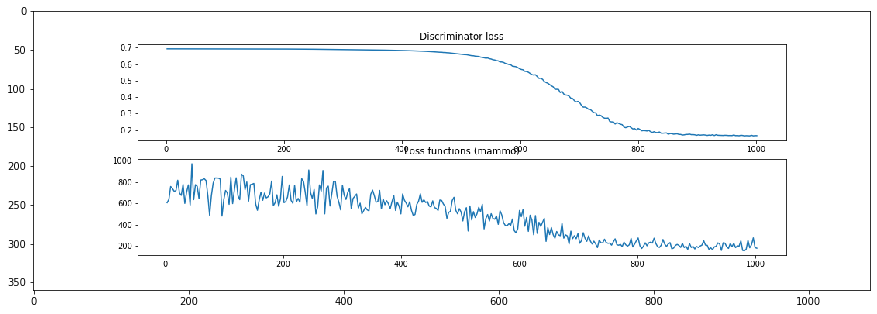

In [23]:
im = plt.imread("./lossmammo.png")
fig = plt.figure(figsize = (15,10))
plt.imshow(im)

In [24]:

type = 'mammo'
load_name = 'mammo'
# new model save name
save_name = 'mammo'
 # load GAN model weights
load_weights = False
# save new model?
new_model = True
# pretrain with VGG            
train_vgg = False
load_vgg = False

MAMMO = CiGAN(save_name, load_name, patch_size, epochs,batch_size, 
              new_model, train_vgg=train_vgg, load_vgg=load_vgg,
              load_weights=load_weights,l1_factor = 1200.0, type = type,
              save_model = False)

MAMMO.build_model()



Building generator
(?, 4, 4, 128)
(?, 8, 8, 128)
(?, 16, 16, 64)
(?, 32, 32, 64)
(?, 64, 64, 32)
(?, 128, 128, 32)
(?, 256, 256, 32)
(?, 256, 256, 32) g_lastconv_256
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
Losses mammo have been configured
Solver mammo has been configured


In [25]:
#SAME PARAMS AS MAMMO
learn_rate = tf.train.exponential_decay(5e-5, MAMMO.global_step,750, 0.99, staircase=False)
MAMMO.set_new_optimizer(tf.train.RMSPropOptimizer(learning_rate=learn_rate))

###  RMSProp

In [6]:
lr = np.linspace(1e-5,1e-4,10)

In [7]:
lr

array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
       9.e-05, 1.e-04])

In [5]:
"conf exp"
patch_size = 256
#learn_rate = 1e-4
batch_size = 8
epochs =  3500
l1_factor = 800.0

def build_cigan(type_):
    load_name = type_
    # new model save name
    save_name = type_
     # load GAN model weights
    load_weights = False
    # save new model?
    new_model = True
    # pretrain with VGG            
    train_vgg = False
    load_vgg = False

    return CiGAN(save_name, load_name, patch_size, epochs,batch_size, 
                  new_model, train_vgg=train_vgg, load_vgg=load_vgg,
                  load_weights=load_weights,l1_factor = l1_factor, type = type_,
                  save_model = False)

def experiment_opt(type_)
    lr = np.linspace(1e-5,1e-4,10)
    data = []
    for learn_rate in lr:
        opt = tf.train.RMSPropOptimizer(learning_rate=learn_rate)
        model = build_cigan(type_)
        model.build_model()
        model.set_new_optimizer(opt)
        results = model.train_model()
        data.append(results)
    #end experiment
    data = np.stack(data)
    print("EXP {} is finished".format(type_))
    directory = './results/' + model.save_name + '/'
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    np.savez_compressed('{}Exp_{}'.format(directory,self.type), loss = data)
    print("saved")
        
    
    
    

In [10]:
d,e = [],[]

for i in range(4):
    d.append([i,i-2])
e.append(d)
e.append(d)
e.append(d)

print(np.stack(e).shape)

(3, 4, 2)
